# Principal Component Analysis using Sklearn on Surface Type Classification for Autonomous Robot Indoor Navigation - Dataset
## Dataset downloaded from https://zenodo.org/records/2653918
##  CPE 490 590
### Author: Rahul Bhadani

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Let's load the dataset
## Note that features and labels are in two different files.
## Files are saved as saved as numpy array

In [6]:

import matplotlib.pyplot as plt

# Load the data
X_data = np.load('Dataset/Autonomous_Robot_Indoor_Navigation/X_data.npy')
labels = np.load('Dataset/Autonomous_Robot_Indoor_Navigation/label.npy')

In [7]:
X_data.shape

(7626, 128, 10)

Dataset is timeseries so it is three D. We need to make it 2D.

In [10]:
# Reshape X_data to 2D
X_data_reshaped = X_data.reshape(X_data.shape[0], -1)

# Standardize the features

In [11]:
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X_data_reshaped)

# Apply PCA

In [12]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_data_scaled)


# Make 2D Plot

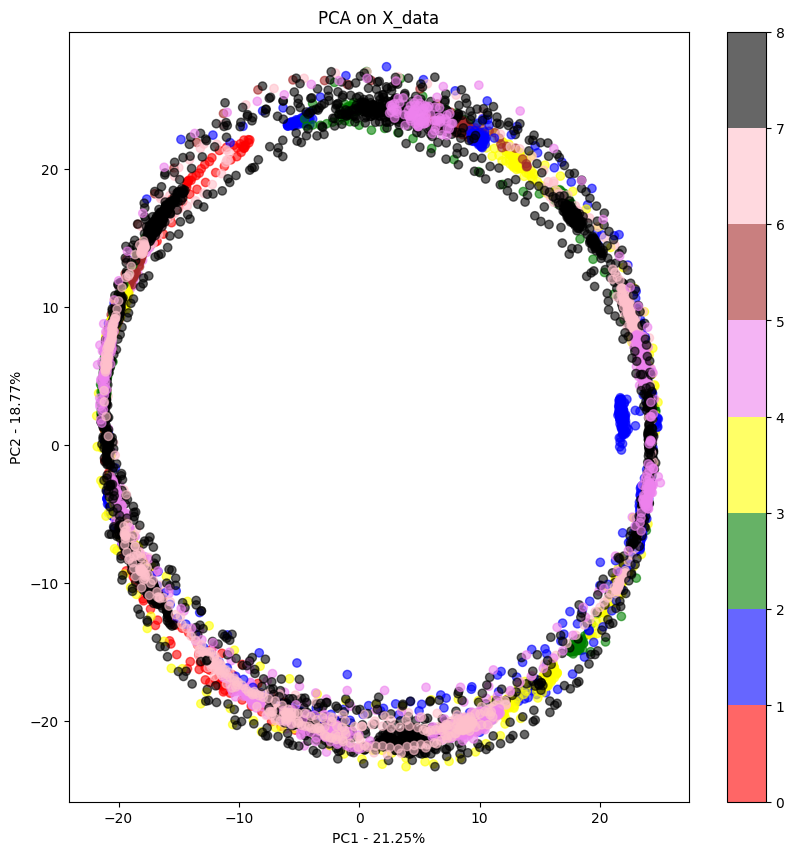

In [13]:

# Create a discrete colormap
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'blue', 'green', 'yellow', 'violet', 'brown', 'pink', 'black'])  # Add more colors if you have more labels


# Create a scatter plot
plt.figure(figsize=(10,10))
scatter = plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=labels, cmap=cmap, alpha=0.6)
plt.xlabel('PC1 - {0}%'.format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('PC2 - {0}%'.format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title('PCA on X_data')
plt.colorbar(scatter)
plt.show()

# Apply 3component PCA and make 3D Plot

In [14]:
# Apply PCA
pca_3 = PCA(n_components=3)
data_3d = pca_3.fit_transform(X_data_scaled)

import plotly.express as px
import pandas as pd
# Create a DataFrame for the 3D PCA result
df_3d = pd.DataFrame(data_3d, columns=['PC1', 'PC2', 'PC3'])
df_3d['Label'] = labels  # Add the labels to the DataFrame

# Create the 3D plot
fig = px.scatter_3d(df_3d, x='PC1', y='PC2', z='PC3', color='Label')

# Customize the axes labels
fig.update_layout(scene=dict(
                    xaxis=dict(range=[df_3d['PC1'].min(), df_3d['PC1'].max()]),
                    yaxis=dict(range=[df_3d['PC2'].min(), df_3d['PC2'].max()]),
                    zaxis=dict(range=[df_3d['PC3'].min(), df_3d['PC3'].max()]),
                    aspectmode='cube',
                    xaxis_title='PC1 - {0}%'.format(round(pca_3.explained_variance_ratio_[0]*100, 2)),
                    yaxis_title='PC2 - {0}%'.format(round(pca_3.explained_variance_ratio_[1]*100, 2)),
                    zaxis_title='PC3 - {0}%'.format(round(pca_3.explained_variance_ratio_[2]*100, 2))
))

fig.show()



# Observation
We see from 2D and 3D plot that it is hard to distinguish different classes. Hence PCA might not be a suitable choice of data visualization for this dataset.